# Практическая работа №1: Формирование и первичная обработка выборки. Ранжированный и интервальный ряды

Выполнили студенты гр. 9383 Камзолов Никита и Крейсманн Кирилл. Вариант №3

## Цель работы

Ознакомление с основными правилами формирования выборки и подготовки выборочных данных к статистическому анализу.

## Основные теоретические положения

**Генеральная совокупность** – это совокупность всех мысленно возможных объектов данного вида, над которыми проводятся наблюдения с целью получения конкретных значений определенной случайной величины.

**Выборкой** (выборочной совокупностью) называется совокупность случайно отобранных объектов из генеральной совокупности.

**Ранжированный ряд** - это распределение отдельных единиц совокупности в порядке возрастания или убывания исследуемого признака. Ранжирование позволяет легко разделить количественные данные по группам, сразу обнаружить наименьшее и наибольшее значения признака, выделить значения, которые чаще всего повторяются.

**Вариационным рядом** называется ряд данных, в которых указаны возможные значения варьирующего признака $(x_1, x_2, ..., x_m)$ в порядке возрастания $(x_1 < x_2 <...<x_m)$ или убывания $(x_1 > x_2 > ... > x_m)$ и соответствующие им частоты.


**Интервальный (вариационный) ряд** - это ряд распределения, в котором однородные группы составлены по признаку, меняющемуся непрерывно или принимающему слишком много значений.

В общем виде интервальный ряд представляет собой следующую таблицу:

    
| <!-- -->    | <!-- -->    | <!-- -->    | <!-- -->    | <!-- -->    |
|-------------|-------------|-------------|-------------|-------------|
|  Интервалы $(a_{i-1}, a_i)$      | $[a_0, a_1)$        | $[a_1, a_2)$         | $...$         | $[a_{k-1}, a_k)$         |
| Частоты $n_i$         | $n_1$         | $n_2$         | $...$         | $n_k$         |

**Правило Стерджеса** - эмпирическое правило определения оптимального количества интервалов k, на которые следует разбить ряд из N чисел:
<p style="font-size: 20px; text-align: center;">$k=1+\left\lfloor 3.31 * log_{10}N \right\rfloor$</p>

**Шаг интервального ряда** – это отношение размаха вариации к количеству интервалов, округленное вверх до определенной точности:
<p style="font-size: 20px; text-align: center;">$h = \left\lceil \frac{x_{max} - x_{min}}{k} \right\rceil$</p>



**Полигоном** частот называют ломаную, отрезки которой соединяют точки $(x_1, n_1), (x_2, n_2), …, (x_k, n_k)$. Для построения полигона частот на оси абсцисс откладывают варианты $x_i$, а на оси ординат – соответствующие им частоты $n_i$. Точки $(x_i, n_i)$ соединяют отрезками прямых и получают полигон частот.

**Гистограммой частот** называют ступенчатую фигуру, состоящую из прямоугольников, основаниями которых служат частичные интервалы длиною $h,$ а высоты равны отношению частоты интервала к шагу: <p style="font-size: 20px; text-align: center;">$\frac{n_i}{h}$</p>

**Эмпирической функцией распределения** называют такую функцию, которая определяет для каждого значения $x$ частоту событий $X < x$ и предназначена для оценки теоретической функции распределения генеральной совокупности в математической статистике. Эмпирическая функция распределения находится по формуле
<p style="font-size: 20px; text-align: center;">$F_n(x) = \frac{n_x}{n}$</p>

$n$ — объем выборки; $n_x$ — количество наблюдений (вариантов) меньше $x$.




## Постановка задачи

Осуществить формирование репрезентативной выборки заданного объема из имеющейся генеральной совокупности экспериментальных данных. Осуществить последовательное преобразование полученной выборки в ранжированный, вариационный и интервальный ряды. Применительно к интервальному ряду построить и отобразить графически полигон, гистограмму и эмпирическую функцию распределения для абсолютных и относительных частот. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

Выборка была заранее сформирована путем случайного извлечения 107 элементов из генеральной совокупности, содержащей данные наблюдения относительно объемного веса $ν$ (г/см³) при влажности 10% и модуля упругости $E$ (кг/см²) при сжатии вдоль волокон древесины резонансной ели.

In [2]:
df = pd.read_csv('sample.csv', index_col=0)
df.head()

,nu,E
0,560,169.8
1,547,154.7
2,528,163.4
3,376,103.1
4,418,118.4


Будем осуществлять преобразование выборки относительно объемного веса.

In [3]:
series = df.nu.copy() # берем столбец nu
length = series.size
series.head()

0    560
1    547
2    528
3    376
4    418
Name: nu, dtype: int64

### 1. Последовательно преобразовать выборку в ранжированный, вариационный и интервальный ряды. Интервальный ряд представить в виде таблицы. Результаты содержательно проинтерпретировать.

##### Преобразование в ранжированный ряд:

In [4]:
ranked_series_array = series.values
ranked_series_array.sort() # сортируем данные
ranked_series = pd.Series(ranked_series_array, name = "$\\nu$, (г/см³)") # записываем в Series для красивого вывода
#print(ranked_series.to_markdown()) # красивый вывод в виде таблицы, которую можно вставить в Markdowm

|     |   $\nu$, (г/см³) |
|----:|-----------------:|
|   0 |              344 |
|   1 |              345 |
|   2 |              352 |
|   3 |              353 |
|   4 |              353 |
|   5 |              359 |
|   6 |              362 |
|   7 |              362 |
|   8 |              366 |
|   9 |              371 |
|  10 |              376 |
|  11 |              390 |
|  12 |              391 |
|  13 |              393 |
|  14 |              394 |
|  15 |              395 |
|  16 |              399 |
|  17 |              399 |
|  18 |              407 |
|  19 |              409 |
|  20 |              411 |
|  21 |              411 |
|  22 |              412 |
|  23 |              412 |
|  24 |              414 |
|  25 |              415 |
|  26 |              417 |
|  27 |              418 |
|  28 |              418 |
|  29 |              419 |
|  30 |              421 |
|  31 |              421 |
|  32 |              421 |
|  33 |              422 |
|  34 |              422 |
|  35 |              422 |
|  36 |              424 |
|  37 |              426 |
|  38 |              428 |
|  39 |              432 |
|  40 |              433 |
|  41 |              433 |
|  42 |              434 |
|  43 |              434 |
|  44 |              435 |
|  45 |              436 |
|  46 |              436 |
|  47 |              437 |
|  48 |              437 |
|  49 |              438 |
|  50 |              438 |
|  51 |              438 |
|  52 |              440 |
|  53 |              440 |
|  54 |              440 |
|  55 |              441 |
|  56 |              446 |
|  57 |              448 |
|  58 |              448 |
|  59 |              452 |
|  60 |              453 |
|  61 |              457 |
|  62 |              458 |
|  63 |              458 |
|  64 |              458 |
|  65 |              462 |
|  66 |              463 |
|  67 |              463 |
|  68 |              463 |
|  69 |              468 |
|  70 |              470 |
|  71 |              473 |
|  72 |              473 |
|  73 |              474 |
|  74 |              475 |
|  75 |              478 |
|  76 |              479 |
|  77 |              480 |
|  78 |              481 |
|  79 |              493 |
|  80 |              496 |
|  81 |              498 |
|  82 |              500 |
|  83 |              502 |
|  84 |              503 |
|  85 |              504 |
|  86 |              504 |
|  87 |              507 |
|  88 |              510 |
|  89 |              514 |
|  90 |              514 |
|  91 |              517 |
|  92 |              518 |
|  93 |              518 |
|  94 |              525 |
|  95 |              528 |
|  96 |              536 |
|  97 |              541 |
|  98 |              542 |
|  99 |              544 |
| 100 |              545 |
| 101 |              547 |
| 102 |              548 |
| 103 |              560 |
| 104 |              569 |
| 105 |              572 |
| 106 |              585 |

Из ранжированного ряда можно сказать, что минимальное значение объемного веса $\nu_{min}=344$, а максимальное значение $\nu_{max}=585$

##### Преобразование в вариационный ряд:

In [5]:
nu_to_freq = {} # Словарь, который будет содержать соответствие объемный вес - абсолютная частота
for item in ranked_series_array:
    nu_to_freq[item] = nu_to_freq.get(item, 0) + 1 # считаем частоту и записываем уникальные веса в словарь
variation_series = pd.Series(data=nu_to_freq.values(), index=nu_to_freq.keys(), name="$n_i$ (Частота)")
variation_series.index.name = "$\\nu$, (г/см³)"
#print(variation_series.to_markdown())

|   $\nu$, (г/см³) |   $n_i$ (Частота) |
|-----------------:|------------------:|
|              344 |                 1 |
|              345 |                 1 |
|              352 |                 1 |
|              353 |                 2 |
|              359 |                 1 |
|              362 |                 2 |
|              366 |                 1 |
|              371 |                 1 |
|              376 |                 1 |
|              390 |                 1 |
|              391 |                 1 |
|              393 |                 1 |
|              394 |                 1 |
|              395 |                 1 |
|              399 |                 2 |
|              407 |                 1 |
|              409 |                 1 |
|              411 |                 2 |
|              412 |                 2 |
|              414 |                 1 |
|              415 |                 1 |
|              417 |                 1 |
|              418 |                 2 |
|              419 |                 1 |
|              421 |                 3 |
|              422 |                 3 |
|              424 |                 1 |
|              426 |                 1 |
|              428 |                 1 |
|              432 |                 1 |
|              433 |                 2 |
|              434 |                 2 |
|              435 |                 1 |
|              436 |                 2 |
|              437 |                 2 |
|              438 |                 3 |
|              440 |                 3 |
|              441 |                 1 |
|              446 |                 1 |
|              448 |                 2 |
|              452 |                 1 |
|              453 |                 1 |
|              457 |                 1 |
|              458 |                 3 |
|              462 |                 1 |
|              463 |                 3 |
|              468 |                 1 |
|              470 |                 1 |
|              473 |                 2 |
|              474 |                 1 |
|              475 |                 1 |
|              478 |                 1 |
|              479 |                 1 |
|              480 |                 1 |
|              481 |                 1 |
|              493 |                 1 |
|              496 |                 1 |
|              498 |                 1 |
|              500 |                 1 |
|              502 |                 1 |
|              503 |                 1 |
|              504 |                 2 |
|              507 |                 1 |
|              510 |                 1 |
|              514 |                 2 |
|              517 |                 1 |
|              518 |                 2 |
|              525 |                 1 |
|              528 |                 1 |
|              536 |                 1 |
|              541 |                 1 |
|              542 |                 1 |
|              544 |                 1 |
|              545 |                 1 |
|              547 |                 1 |
|              548 |                 1 |
|              560 |                 1 |
|              569 |                 1 |
|              572 |                 1 |
|              585 |                 1 |

Из вариационного ряда можем увидеть, что элементы выборки редко совпадают и максимальное число повторений одного символа $n_{max}$ = 3. Наиболее частотные элементы $\nu = 421, 422, 438, 440, 458, 463$

##### Построение интервального ряда:

In [6]:
series.size
k = int(1 + np.log2(series.size)) # правило Стерджеса
k

7

In [7]:
h = math.ceil((series.max() - series.min()) / k) # Нахождение шага интервального ряда
h

35

In [8]:
bounds = np.arange(ranked_series.min(), ranked_series.max(), h) # записываем границы интервалов
bounds = np.append(bounds, ranked_series.max()) # arange - то же самое, что пробежаться for-ом
print(bounds)

[344 379 414 449 484 519 554 585]


In [9]:
intervals_strings = np.array([]) # Получаем строковые интервалы
for i in range(0, len(bounds)-2):
    intervals_strings = np.append(intervals_strings, '[{}, {})'.format(bounds[i], bounds[i + 1]))
intervals_strings = np.append(intervals_strings, '[{}, {}]'.format(bounds[len(bounds)-2], bounds[len(bounds)-1]))
print(intervals_strings)

['[344, 379)' '[379, 414)' '[414, 449)' '[449, 484)' '[484, 519)'
 '[519, 554)' '[554, 585]']


In [10]:
series_array_splitted = [[] for i in range(k)] #двумерный массив, который будет содержать массивы весов по интервалам
interval_index = 0
for item in ranked_series_array:
    if interval_index == k:
        break
    if interval_index == len(intervals_strings)-1:
        if bounds[interval_index] <= item <= bounds[interval_index + 1]: # для последнего нестрогого неравенства
            series_array_splitted[interval_index].append(item)
        else:
            interval_index += 1
            series_array_splitted[interval_index].append(item)
    else:
        if bounds[interval_index] <= item < bounds[interval_index + 1]: # для остальных неравенств
            series_array_splitted[interval_index].append(item)
        else:
            interval_index += 1
            series_array_splitted[interval_index].append(item)
print(series_array_splitted) #разбили веса по интервалам

[[344, 345, 352, 353, 353, 359, 362, 362, 366, 371, 376], [390, 391, 393, 394, 395, 399, 399, 407, 409, 411, 411, 412, 412], [414, 415, 417, 418, 418, 419, 421, 421, 421, 422, 422, 422, 424, 426, 428, 432, 433, 433, 434, 434, 435, 436, 436, 437, 437, 438, 438, 438, 440, 440, 440, 441, 446, 448, 448], [452, 453, 457, 458, 458, 458, 462, 463, 463, 463, 468, 470, 473, 473, 474, 475, 478, 479, 480, 481], [493, 496, 498, 500, 502, 503, 504, 504, 507, 510, 514, 514, 517, 518, 518], [525, 528, 536, 541, 542, 544, 545, 547, 548], [560, 569, 572, 585]]


In [11]:
# Заводим массивы для каждого столбца таблицы
middle_points = [] # середина i-го частичного интервала;
absolute_frequencies = [] # абсолютная частота i-го частичного интервала;
relative_frequencies = [] # относительная частота i-го частичного интервала;
accumulated_absolute_frequencies = [] # накопленная абсолютная частота для i-го частичного интервала;
accumulated_relative_frequencies = [] # накопленная относительная частота для i-го частичного интервала.

interval_index = 0
for series in series_array_splitted: # забиваем данные таблицы для каждого интервала
    middle_points.append(bounds[interval_index] + (bounds[interval_index + 1] - bounds[interval_index]) / 2) # середина i-го частичного интервала;
    interval_index += 1
    absolute_frequencies.append(len(series)) # абсолютная частота i-го частичного интервала;
    relative_frequencies.append(len(series) / len(ranked_series)) # относительная частота i-го частичного интервала;
    if len(accumulated_absolute_frequencies) == 0: # накопленная абсолютная частота для i-го частичного интервала;
        accumulated_absolute_frequencies.append(len(series))
    else:
        accumulated_absolute_frequencies.append(len(series) + accumulated_absolute_frequencies[-1])
    if len(accumulated_relative_frequencies) == 0: # накопленная относительная частота для i-го частичного интервала.
        accumulated_relative_frequencies.append(len(series) / len(ranked_series))
    else:
        accumulated_relative_frequencies.append(len(series) / len(ranked_series) + accumulated_relative_frequencies[-1])

In [12]:
# Отдельно посчитаем сумму для столбцов абсолютной и относительной частоты
print("Сумма асболютных частот {}".format(sum(absolute_frequencies)))
print("Сумма относительных частот {}".format(sum(relative_frequencies)))

Сумма асболютных частот 107
Сумма относительных частот 1.0


In [13]:
interval_table = pd.DataFrame({ "[$x_{i), x_(i+1)$)" :  intervals_strings,
                                "$\\tilde{x}_i$" : middle_points,
                                "$n_i$" : absolute_frequencies,
                                "$p_i^*$" : relative_frequencies,
                                "$n_i^{\\sum}$" : accumulated_absolute_frequencies,
                                "$p_i^{\\sum}$" : accumulated_relative_frequencies
                              }) # Формируем таблицу
interval_table.index = interval_table.index + 1
# print(interval_table.to_markdown())

|   | $[x_{i}, x_{i+1})$ | $\tilde{x}_{i}$ | $n_i$ | $p^*_i$ | $n_{i}^{\Sigma}$ | $p_{i}^{\Sigma}$ |
|:-:|:------------------:|:-------------:|:-----:|:-----:|:--------------:|:--------------:|
| 1 |    $[344, 379)$    |      361.5      |    11   | 0.102804  |        11       |       0.102804     |
| 2 |    $[379, 414)$    |      396.5     |  13  | 0.121495 |       24       |      0.224299     |
| 3 |    $[414, 449)$    |      431.5      |   35| 0.327103 |       59       |      0.551402     |
| 4 |    $[449, 484)$    |      466.5     |    20 | 0.186916 |        79      |      0.738318     |
| 5 |    $[484, 519)$    |      501.5     |   15  | 0.140187 |       94       |      0.878505     |
| 6 |    $[519, 554)$    |      536.5     |   9  | 0.0841121 |       103      |      0.962617     |
| 7 |    $[554, 585]$    |      569.5     |   4   | 0.0373832 |       107      |      1     |
|||$\sum$|107|1.0|-|-|-|

Из полученного интервального ряда видно, что больше всего данных находится на интервале [414, 449), ближе к концам интервалов данных заметно меньше. Как и ожидалось, при сложении результатов абсолютных частот интервалов в сумме получается размер исходной выборки, а при сложении относительных частот интервалов в сумме получается единица.
По правилу Стерджеса интервальный ряд был разбит на 7 интервалов с шагом 35.

### 2. Для абсолютных частот построить и отобразить графически полигон, гистограмму и эмпирическую функцию. Сделать выводы.

##### Построение полигона абсолютных частот

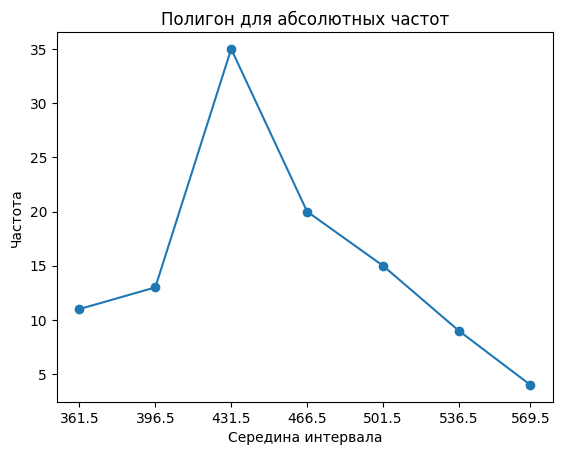

In [14]:
x = middle_points
y = absolute_frequencies
plt.title("Полигон для абсолютных частот") # Заголовок
plt.xticks(x) # засечки на абсциссе
plt.xlabel('Середина интервала') # Название абсциссы
plt.ylabel('Частота') # Название ординаты
plt.plot(x, y) # Рисуем линию
plt.scatter(x, y) # Рисуем точки

На графике очень хорошо видно, как абсолютная частота возрастает к середине третьего интервала.

##### Построение гистограммы абсолютных частот

(array([0.31428571, 0.37142857, 1.        , 0.57142857, 0.42857143,
        0.25714286, 0.11428571]),
 array([344., 379., 414., 449., 484., 519., 554., 585.]),
 <BarContainer object of 7 artists>)

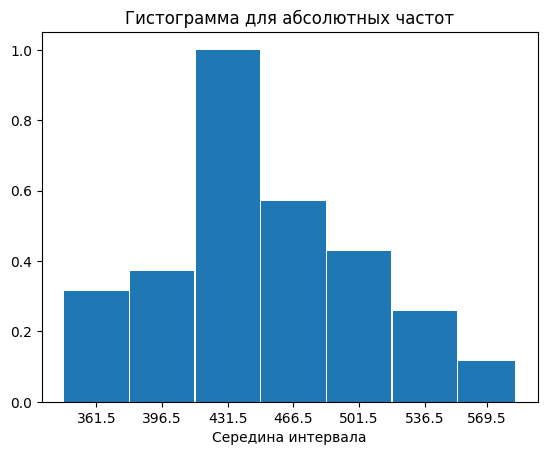

In [22]:
plt.title("Гистограмма для абсолютных частот") # Заголовок
plt.xticks(middle_points) # засечки на абсциссе
plt.xlabel('Середина интервала') # Название абсциссы
plt.hist(middle_points, bounds, weights=[x / h for x in absolute_frequencies], rwidth=0.98) # Рисуем гистограмму по средним точкам, границам интервалов и абсолютной частоте

На гистограмме можно увидеть, что в третий интервал попадает больше всего элементов. Результат построения гистограммы схож с результатом построения полигона абсолютных частот.

##### Построение эмпирической функции для абсолютных частот

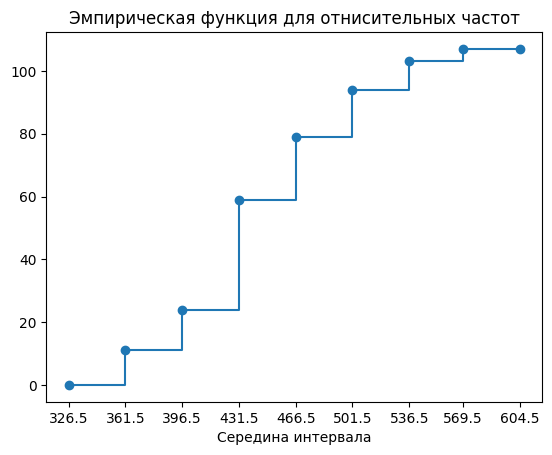

In [16]:
x = [middle_points[0] - h] + middle_points + [middle_points[-1] + h] # Добавим точки в начало и конец, чтобы показать промежутки
y = [0] + accumulated_absolute_frequencies + [length]                     # в которых эмпирическая функция 0 и 1
plt.title("Эмпирическая функция для отнисительных частот") # Заголовок
plt.xticks(x) # засечки на абсциссе
plt.xlabel('Середина интервала') # Название абсциссы
plt.step(x, y, where="post") # Рисуем линию
plt.scatter(x, y) # Рисуем точки

Здесь также видно, что функция получает наибольший рост в середине третьего интервала.

### 3.  Выполнить п. 2 для относительных частот. Сравнить результаты и сделать выводы.

##### Построение полигона относительных частот

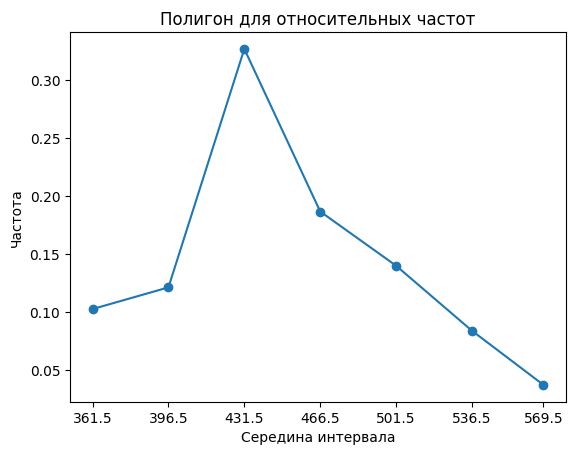

In [17]:
x = middle_points
y = relative_frequencies
plt.title("Полигон для относительных частот") # Заголовок
plt.xticks(x) # засечки на абсциссе
plt.xlabel('Середина интервала') # Название абсциссы
plt.ylabel('Частота') # Название ординаты
plt.plot(x, y) # Рисуем линию
plt.scatter(x, y) # Рисуем точки

##### Построение гистограммы относительных частот

(array([0.00293725, 0.0034713 , 0.00934579, 0.00534045, 0.00400534,
        0.0024032 , 0.00106809]),
 array([344., 379., 414., 449., 484., 519., 554., 585.]),
 <BarContainer object of 7 artists>)

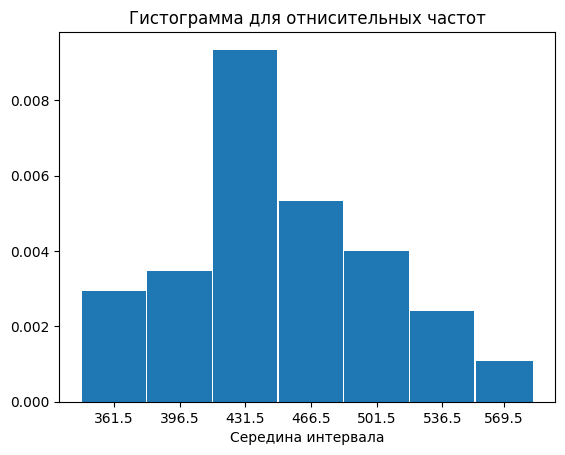

In [23]:
plt.title("Гистограмма для отнисительных частот") # Заголовок
plt.xticks(middle_points) # засечки на абсциссе
plt.xlabel('Середина интервала') # Название абсциссы
plt.hist(middle_points, bounds, weights=[x / h for x in relative_frequencies], rwidth=0.98) # Рисуем гистограмму по средним точкам, границам интервалов и относительной частоте

##### Построение эмпирической функции для относительных частот

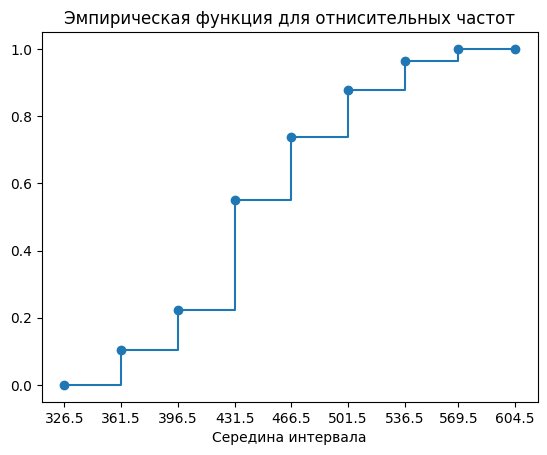

In [19]:
x = [middle_points[0] - h] + middle_points + [middle_points[-1] + h] # Добавим точки в начало и конец, чтобы показать промежутки
y = [0] + accumulated_relative_frequencies + [1]                     # в которых эмпирическая функция 0 и 1
plt.title("Эмпирическая функция для отнисительных частот") # Заголовок
plt.xticks(x) # засечки на абсциссе
plt.xlabel('Середина интервала') # Название абсциссы
plt.step(x, y, where="post") # Рисуем линию
plt.scatter(x, y) # Рисуем точки

Все графики для относительных частот (соответственно, и выводы для них) совпадают с аналогичными графиками для абсолютных частот. Это связано с тем, что все представленные графики по $X$ зависят только от середин интервалов, которые не изменяются для абсолютных и относительных частот, а по $Y$ все величины в случае относительных частот были поделены на одно и то же число (размер выборки), соответственно, график просто сместился с диапозона [0, n] на [0, 1].

## Выводы

Из выборки были построены ранжированный, вариационный и интервальный ряды. Интервальный ряд был построен в виде таблицы с интервалами и характеристиками этих интервалов.

На основе ранжированного ряда были найдены максимальное и минимальное значения выборки.

С помощью вариационного ряда получены наиболее частотные элементы.

Из интервального ряда были построены полигон, гистограмма и эмпирическая функция распределения для абсолютных и относительных частот. Не было найдено различий при сравнении графиков для абсолютных и относительных частот. Также по графикам можно предположить, что генеральная совокупность, из которой была извлечена выборка имеет нормальное распределение.